In [1]:
    %reload_ext pidgin.strings

During the research process; developers of `uarray` `object`s may require multiple views to understand the their equations.

In [2]:
    import uarray
    from uarray import *

The `expression` created by the following example with __2__ abstract dimensions `A and B` has many potential views.    

In [3]:
    A, B = AbstractWithDimension(3, "A"), AbstractWithDimension(3, "B")    

`__expression__` is a generator function for the sample equation.  The value `expression` is immutable; when reductions are applied to the `object`
the state changes.  `__expression__` will let us recreate the same representation mulitple times.

In [4]:
    __expression__ = lambda: InnerProduct(
        Index(vector(1, 0), A),
        ScalarAccessor(Add),
        ScalarAccessor(Multiply),
        Index(
            vector(2),
            OuterProduct(
                Index(vector(1, 0), A),
                ScalarAccessor(Multiply),
                Index(vector(0, 1), B),
            ),
        ),
    ); expression = __expression__(); __import__('pprint').pprint(expression)

InnerProduct(Index(Array(ScalarAccessor('2'),
                         VectorAccessor(ScalarAccessor('1'),
                                        ScalarAccessor('0'))),
                   AbstractWithDimension('3', variable_name=A)),
             ScalarAccessor("Add['+', Arity(min_count=2, fixed_size=True), infix]"),
             ScalarAccessor("Multiply['*', Arity(min_count=2, fixed_size=True), infix]"),
             Index(Array(ScalarAccessor('1'),
                         VectorAccessor(ScalarAccessor('2'))),
                   OuterProduct(Index(Array(ScalarAccessor('2'),
                                            VectorAccessor(ScalarAccessor('1'),
                                                           ScalarAccessor('0'))),
                                      AbstractWithDimension('3', variable_name=A)),
                                ScalarAccessor("Multiply['*', Arity(min_count=2, fixed_size=True), infix]"),
                                Index(Array(ScalarAccessor('2

In [8]:
    import vdom, pprint

In [12]:
    """Out of the 📦, an __{{type(expression).__name__}}__ `object` already has a few representations.

* `str` representation

<code>{{str(expression)}}</code>

* `pprint and repr` format

{{vdom.pre(vdom.code(pprint.pformat(expression)))}}"""

Out of the 📦, an __InnerProduct__ `object` already has a few representations.

* `str` representation

<code>((Array(2, <1 0>) ψ A^3) +·* (Array(1, <2>) ψ ((Array(2, <1 0>) ψ A^3) ·* (Array(2, <0 1>) ψ B^3))))</code>

* `pprint and repr` format

<pre><code>InnerProduct(Index(Array(ScalarAccessor(&#x27;2&#x27;),
                         VectorAccessor(ScalarAccessor(&#x27;1&#x27;),
                                        ScalarAccessor(&#x27;0&#x27;))),
                   AbstractWithDimension(&#x27;3&#x27;, variable_name=A)),
             ScalarAccessor(&quot;Add[&#x27;+&#x27;, Arity(min_count=2, fixed_size=True), infix]&quot;),
             ScalarAccessor(&quot;Multiply[&#x27;*&#x27;, Arity(min_count=2, fixed_size=True), infix]&quot;),
             Index(Array(ScalarAccessor(&#x27;1&#x27;),
                         VectorAccessor(ScalarAccessor(&#x27;2&#x27;))),
                   OuterProduct(Index(Array(ScalarAccessor(&#x27;2&#x27;),
                                            VectorAccessor(ScalarAccessor(&#x27;1&#x27;),
                                                           ScalarAccessor(&#x27;0&#x27;))),
                                      AbstractWithDimension(&#x27;3&#x27;, variable_name=A)),
                                ScalarAccessor(&quot;Multiply[&#x27;*&#x27;, Arity(min_count=2, fixed_size=True), infix]&quot;),
                                Index(Array(ScalarAccessor(&#x27;2&#x27;),
                                            VectorAccessor(ScalarAccessor(&#x27;0&#x27;),
                                                           ScalarAccessor(&#x27;1&#x27;))),
                                      AbstractWithDimension(&#x27;3&#x27;, variable_name=B)))))</code></pre>

I want a web ready view though.  This view combines `pprint`, `black`, and `vdom`.

In [13]:
    import pprint, black, vdom, matchpy, IPython; IPython.get_ipython().display_formatter.formatters['text/html'].for_type(
        matchpy.expressions.expressions.Expression, lambda str: vdom.pre(vdom.code((black).format_str(pprint.pformat(str), 100)))._repr_html_()
    )

Beyond the default representation of the `expression` there are intermediate `reductions` that a researcher may choose to view.

In [14]:
    expression, reductions = __expression__(), []
    while True:
        reductions.append(replace(expression, 1))
        if reductions[-1] == expression: break
        else: expression = reductions[-1]

In [15]:
    """For `expression` there are __{{len(reductions)}}__ `reductions` or intermediates to consider."""

For `expression` there are __50__ `reductions` or intermediates to consider.

One thing we can know is that a widget that compares two states of a reduction is needed.  The view representations should be flexible.

In [16]:
    import ipywidgets

The `extent` will define the `reductions` we are comparing.

In [17]:
    extent = ipywidgets.IntRangeSlider(min=0, max=len(reductions)-1)

`a and b` will be reductions that we can develop concepts with.

In [18]:
    a, b = map(reductions.__getitem__, extent.value)

As an example we could use `difflib` to comparse iterables.    

In [19]:
    import difflib

In [20]:
    """A representation may use the `difflib.unified_diff` function with the `pprint.pprint` `expression` wrapper.

    {{vdom.pre(vdom.code(''.join(difflib.unified_diff(pprint.pformat(a, 2).splitlines(True), pprint.pformat(b, 2).splitlines(True)))))}}"""

A representation may use the `difflib.unified_diff` function with the `pprint.pprint` `expression` wrapper.

<pre><code>--- 
+++ 
@@ -6,14 +6,14 @@
                                                                             UnboundAccessor(&#x27;&#x27;, variable_name=A_content)))))))),
               ScalarAccessor(&quot;Add[&#x27;+&#x27;, Arity(min_count=2, fixed_size=True), infix]&quot;),
               ScalarAccessor(&quot;Multiply[&#x27;*&#x27;, Arity(min_count=2, fixed_size=True), infix]&quot;),
-              Index( Array( ScalarAccessor(&#x27;1&#x27;),
-                            VectorAccessor(ScalarAccessor(&#x27;2&#x27;))),
-                     OuterProduct( Index( Array( ScalarAccessor(&#x27;2&#x27;),
-                                                 VectorAccessor( ScalarAccessor(&#x27;1&#x27;),
-                                                                 ScalarAccessor(&#x27;0&#x27;))),
-                                          AbstractWithDimension(&#x27;3&#x27;, variable_name=A)),
-                                   ScalarAccessor(&quot;Multiply[&#x27;*&#x27;, Arity(min_count=2, fixed_size=True), infix]&quot;),
-                                   Index( Array( ScalarAccessor(&#x27;2&#x27;),
-                                                 VectorAccessor( ScalarAccessor(&#x27;0&#x27;),
-                                                                 ScalarAccessor(&#x27;1&#x27;))),
-                                          AbstractWithDimension(&#x27;3&#x27;, variable_name=B)))))+              Get( ScalarAccessor(&#x27;2&#x27;),
+                   Content( OuterProduct( Array( Content( Get( ScalarAccessor(&#x27;2&#x27;),
+                                                               UnboundAccessor(&#x27;&#x27;, variable_name=A_shape))),
+                                                 ForwardGetAccessor( Array( NoLengthAccessor(),
+                                                                            Content( Get( ScalarAccessor(&#x27;0&#x27;),
+                                                                                          Content( Get( ScalarAccessor(&#x27;1&#x27;),
+                                                                                                        UnboundAccessor(&#x27;&#x27;, variable_name=A_content)))))))),
+                                          ScalarAccessor(&quot;Multiply[&#x27;*&#x27;, Arity(min_count=2, fixed_size=True), infix]&quot;),
+                                          Get( ScalarAccessor(&#x27;1&#x27;),
+                                               Content( Get( ScalarAccessor(&#x27;0&#x27;),
+                                                             Content( AbstractWithDimension(&#x27;3&#x27;, variable_name=B)))))))))</code></pre>

As an example we could use `difflib` to comparse iterables.        

In [21]:
    import difflib

In [22]:
    ip = get_ipython()

In [23]:
    """A representation may use the `difflib.unified_diff` function with the `pprint.pprint` `expression` wrapper.
    
    {{vdom.pre(vdom.code(''.join(difflib.context_diff(pprint.pformat(a, 2).splitlines(True), pprint.pformat(b, 2).splitlines(True)))))}}"""

A representation may use the `difflib.unified_diff` function with the `pprint.pprint` `expression` wrapper.

<pre><code>*** 
--- 
***************
*** 6,19 ****
                                                                              UnboundAccessor(&#x27;&#x27;, variable_name=A_content)))))))),
                ScalarAccessor(&quot;Add[&#x27;+&#x27;, Arity(min_count=2, fixed_size=True), infix]&quot;),
                ScalarAccessor(&quot;Multiply[&#x27;*&#x27;, Arity(min_count=2, fixed_size=True), infix]&quot;),
!               Index( Array( ScalarAccessor(&#x27;1&#x27;),
!                             VectorAccessor(ScalarAccessor(&#x27;2&#x27;))),
!                      OuterProduct( Index( Array( ScalarAccessor(&#x27;2&#x27;),
!                                                  VectorAccessor( ScalarAccessor(&#x27;1&#x27;),
!                                                                  ScalarAccessor(&#x27;0&#x27;))),
!                                           AbstractWithDimension(&#x27;3&#x27;, variable_name=A)),
!                                    ScalarAccessor(&quot;Multiply[&#x27;*&#x27;, Arity(min_count=2, fixed_size=True), infix]&quot;),
!                                    Index( Array( ScalarAccessor(&#x27;2&#x27;),
!                                                  VectorAccessor( ScalarAccessor(&#x27;0&#x27;),
!                                                                  ScalarAccessor(&#x27;1&#x27;))),
!                                           AbstractWithDimension(&#x27;3&#x27;, variable_name=B)))))--- 6,19 ----
                                                                              UnboundAccessor(&#x27;&#x27;, variable_name=A_content)))))))),
                ScalarAccessor(&quot;Add[&#x27;+&#x27;, Arity(min_count=2, fixed_size=True), infix]&quot;),
                ScalarAccessor(&quot;Multiply[&#x27;*&#x27;, Arity(min_count=2, fixed_size=True), infix]&quot;),
!               Get( ScalarAccessor(&#x27;2&#x27;),
!                    Content( OuterProduct( Array( Content( Get( ScalarAccessor(&#x27;2&#x27;),
!                                                                UnboundAccessor(&#x27;&#x27;, variable_name=A_shape))),
!                                                  ForwardGetAccessor( Array( NoLengthAccessor(),
!                                                                             Content( Get( ScalarAccessor(&#x27;0&#x27;),
!                                                                                           Content( Get( ScalarAccessor(&#x27;1&#x27;),
!                                                                                                         UnboundAccessor(&#x27;&#x27;, variable_name=A_content)))))))),
!                                           ScalarAccessor(&quot;Multiply[&#x27;*&#x27;, Arity(min_count=2, fixed_size=True), infix]&quot;),
!                                           Get( ScalarAccessor(&#x27;1&#x27;),
!                                                Content( Get( ScalarAccessor(&#x27;0&#x27;),
!                                                              Content( AbstractWithDimension(&#x27;3&#x27;, variable_name=B)))))))))</code></pre>

Our `ipywidgets` `object` needs to be flexible; it should permit hyper parameter `ipywidgets`.  As a default, it should have the
`extent` and two outputs.

In [24]:
    Α, Β = outputs = ipywidgets.Output(description='The 👈 reduction.'), ipywidgets.Output(description='The 👉 reduction.')

Additionally the author should be able to have a comparator view for the object.   The `difflib` views 
are examples of a `compare` `ipywidgets.Output`.

In [30]:
    compare = ipywidgets.Output()

In [31]:
    import traitlets, toolz.curried as toolz, typing as t, textwrap, abc, IPython; from dataclasses import dataclass, field

In [32]:
    @dataclass
    class Reduction:
        callables = {
            'context_diff': lambda a, b: vdom.pre(vdom.code(''.join(difflib.context_diff(
                pprint.pformat(a).splitlines(), pprint.pformat(b).splitlines()
            )))),
            'unified_diff': lambda a, b: vdom.pre(vdom.code(''.join(difflib.unified_diff(
                pprint.pformat(a).splitlines(), pprint.pformat(b).splitlines()
            )))),
        }
        A: ipywidgets.IntRangeSlider = ipywidgets.IntSlider(description='👈')
        B: ipywidgets.IntRangeSlider = ipywidgets.IntSlider(description='👉')
        comparators: ipywidgets.Dropdown = ipywidgets.Dropdown()
        outputs: t.Tuple[ipywidgets.Output, ipywidgets.Output] = outputs
        compare: ipywidgets.Output = compare

        reductions: list = field(default_factory=lambda:reductions)
            
        def __post_init__(self):
            self.A.value = len(self.reductions)//4
            self.B.value = 3*len(self.reductions)//4
            self.A.observe(self.show_reduction_A)
            self.B.observe(self.show_reduction_B)
            self.comparators.options = list(self.callables)
            self.comparators.observe(self.show_compare, 'value')
            
        def show_compare(self, change=None):
            self.compare.clear_output()
            with self.compare:
                IPython.display.display(self.callables[self.comparators.value](self.a, self.b))
            
            
        @property
        def a(self): return self.reductions[self.A.value]
        
        @property
        def b(self): return self.reductions[self.B.value]
            
        def show_reduction_A(self, change):
            outputs[0].clear_output()
            with outputs[0]: 
                IPython.display.display(vdom.pre(vdom.code(black.format_str(pprint.pformat(self.a), 50))))
                
            self.show_compare()
        def show_reduction_B(self, change):
            outputs[1].clear_output() 
            with outputs[1]: 
                IPython.display.display(vdom.pre(vdom.code(black.format_str(pprint.pformat(self.b), 50))))
            self.show_compare()
        
        def _ipython_display_(self) -> IPython.display:
            IPython.display.display(ipywidgets.HBox(children=[self.A, self.B]))
            accordion = ipywidgets.Accordion(children=[
                ipywidgets.HBox(self.outputs), ipywidgets.VBox(children=[self.comparators, self.compare])
            ])
            accordion.set_title(0, 'Side by side')
            accordion.set_title(1, 'Comparison')
            IPython.display.display(accordion)

In [33]:
    Reduction()

Accordion(children=(HBox(children=(Output(), Output())), VBox(children=(Dropdown(options=('context_diff', 'uni…

# Some 🐼s fu

In [90]:
import pandas

df = pandas.concat({i: pandas.DataFrame(list(recurse(reduction))) for i, reduction in enumerate(reductions)})

df.expression.groupby(df.index.get_level_values(0)).value_counts().unstack(1).fillna(0)

In [20]:
A = pandas.DataFrame(
    df.expression[:, None] == df.expression[None, :],
    df.index, df.index
)

In [22]:
import matplotlib.pyplot

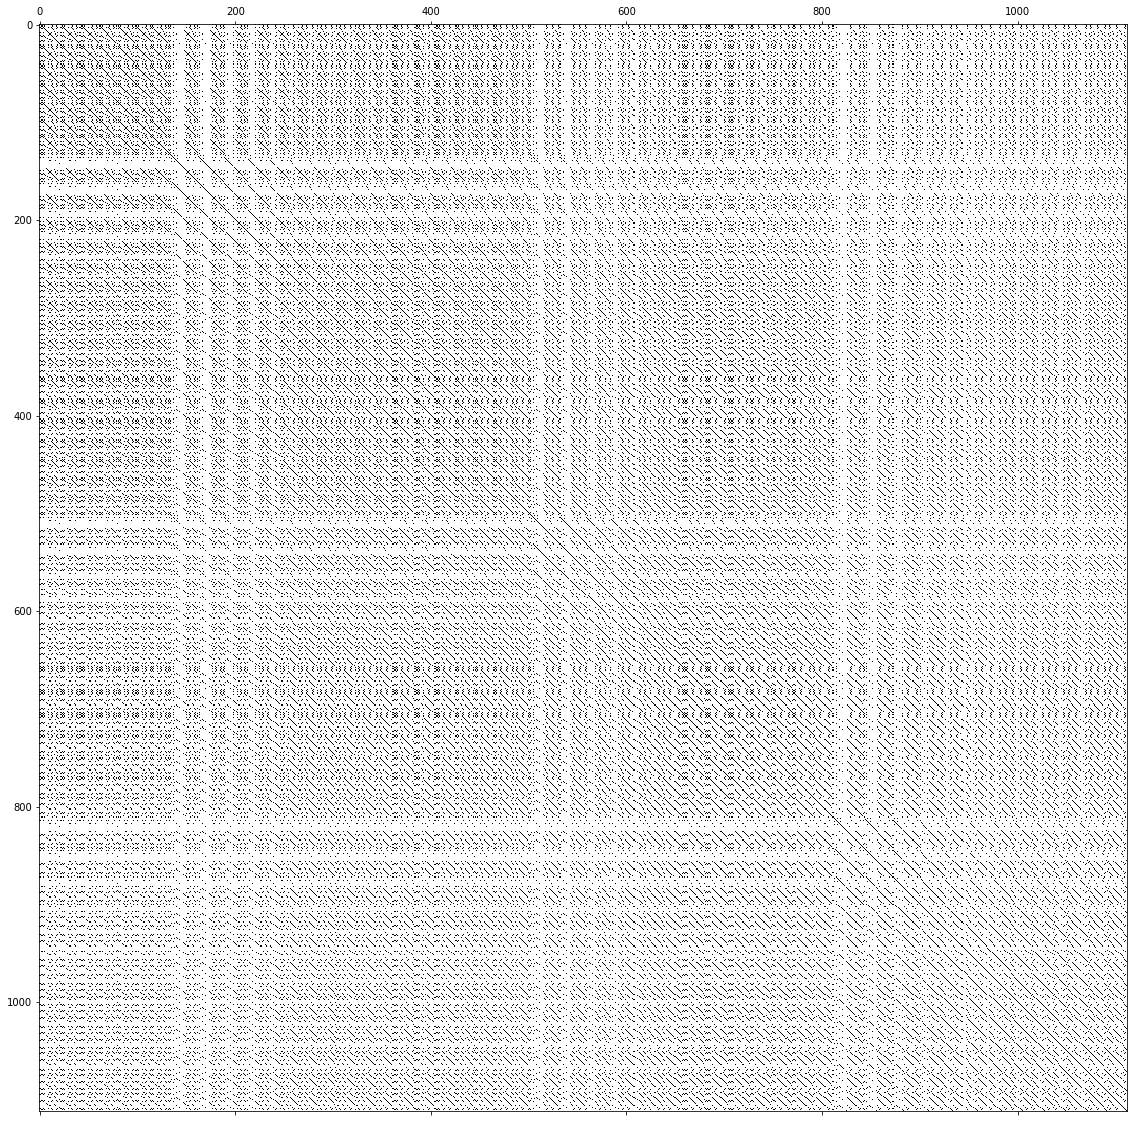

In [31]:
matplotlib.pyplot.spy(A)
matplotlib.pyplot.gcf().set_size_inches(20, 20)